In [ ]:
!pip install geopandas

In [ ]:
!pip install linearmodels

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 10.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.9/88.9 kB 9.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.8/43.8 kB 4.8 MB/s eta 0:00:00


In [ ]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import files
from google.colab import files
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import random
from linearmodels.panel import PanelOLS

In [ ]:
upload = files.upload()
gdf = gpd.read_file("/content/cty_shp.gpkg")

Saving cty_shp.gpkg to cty_shp.gpkg


In [ ]:
upload = files.upload()
df = pd.read_csv('/content/student dataset.csv')

Saving student dataset.csv to student dataset.csv


In [ ]:
df["match_type"] = df["match_type"].astype(object)
gdf['TYPE'] = gdf['TYPE'].astype(int)
merged_df = gdf.merge(df, left_on=["NAME", "RBZ", "TYPE"], right_on=["match_name", "match_rbz", "match_type"])

In [ ]:
years = []
for year in range(1837, 1840):
    years.append(str(year))
cols = [f"rkm_{year}" for year in years]
merged_df["rkm_1830s"] = merged_df[cols].apply(lambda row: row[row.notnull() & (row != 0)].mean(), axis=1)

years = []
for year in range(1840, 1850):
    years.append(str(year))
cols = [f"rkm_{year}" for year in years]
merged_df["rkm_1840s"] = merged_df[cols].apply(lambda row: row[row.notnull() & (row != 0)].mean(), axis=1)

years = []
for year in range(1850, 1860):
    years.append(str(year))
cols = [f"rkm_{year}" for year in years]
merged_df["rkm_1850s"] = merged_df[cols].apply(lambda row: row[row.notnull() & (row != 0)].mean(), axis=1)

years = []
for year in range(1860, 1870):
    years.append(str(year))
cols = [f"rkm_{year}" for year in years]
merged_df["rkm_1860s"] = merged_df[cols].apply(lambda row: row[row.notnull() & (row != 0)].mean(), axis=1)

years = []
for year in range(1870, 1876):
    years.append(str(year))
cols = [f"rkm_{year}" for year in years]
merged_df["rkm_1870s"] = merged_df[cols].apply(lambda row: row[row.notnull() & (row != 0)].mean(), axis=1)

In [ ]:
def calculate_mean_by_year_range(df, start_year, end_year, target_column_prefix):
    years = []
    for year in range(start_year, end_year):
        year_column = f"p_{year}"
        if year_column in df.columns:
            years.append(year_column)

    if years:
        target_column = f"{target_column_prefix}s"
        df[target_column] = df[years].apply(lambda row: row[row.notnull() & (row != 0)].mean(), axis=1)

# Define the ranges and prefixes for each period
year_ranges = [
    (1830, 1840, "p_1830"),
    (1840, 1850, "p_1840"),
    (1850, 1860, "p_1850"),
    (1860, 1870, "p_1860"),
    (1870, 1876, "p_1870")
]

# Calculate means for each period using the defined function
for start_year, end_year, target_prefix in year_ranges:
    calculate_mean_by_year_range(merged_df, start_year, end_year, target_prefix)

In [ ]:
# Replace 'merged_df' with the actual name of your DataFrame
for column in ["p_1830s", "p_1840s", "p_1850s", "p_1860s", "p_1870s"]:
    sorted_values = merged_df[column].sort_values(ascending=False)
    if len(sorted_values) >= 2:
        second_largest = sorted_values.iloc[1]
        largest_index = merged_df[merged_df[column] == sorted_values.iloc[0]].index
        merged_df.loc[largest_index, column] = 1.2 * second_largest

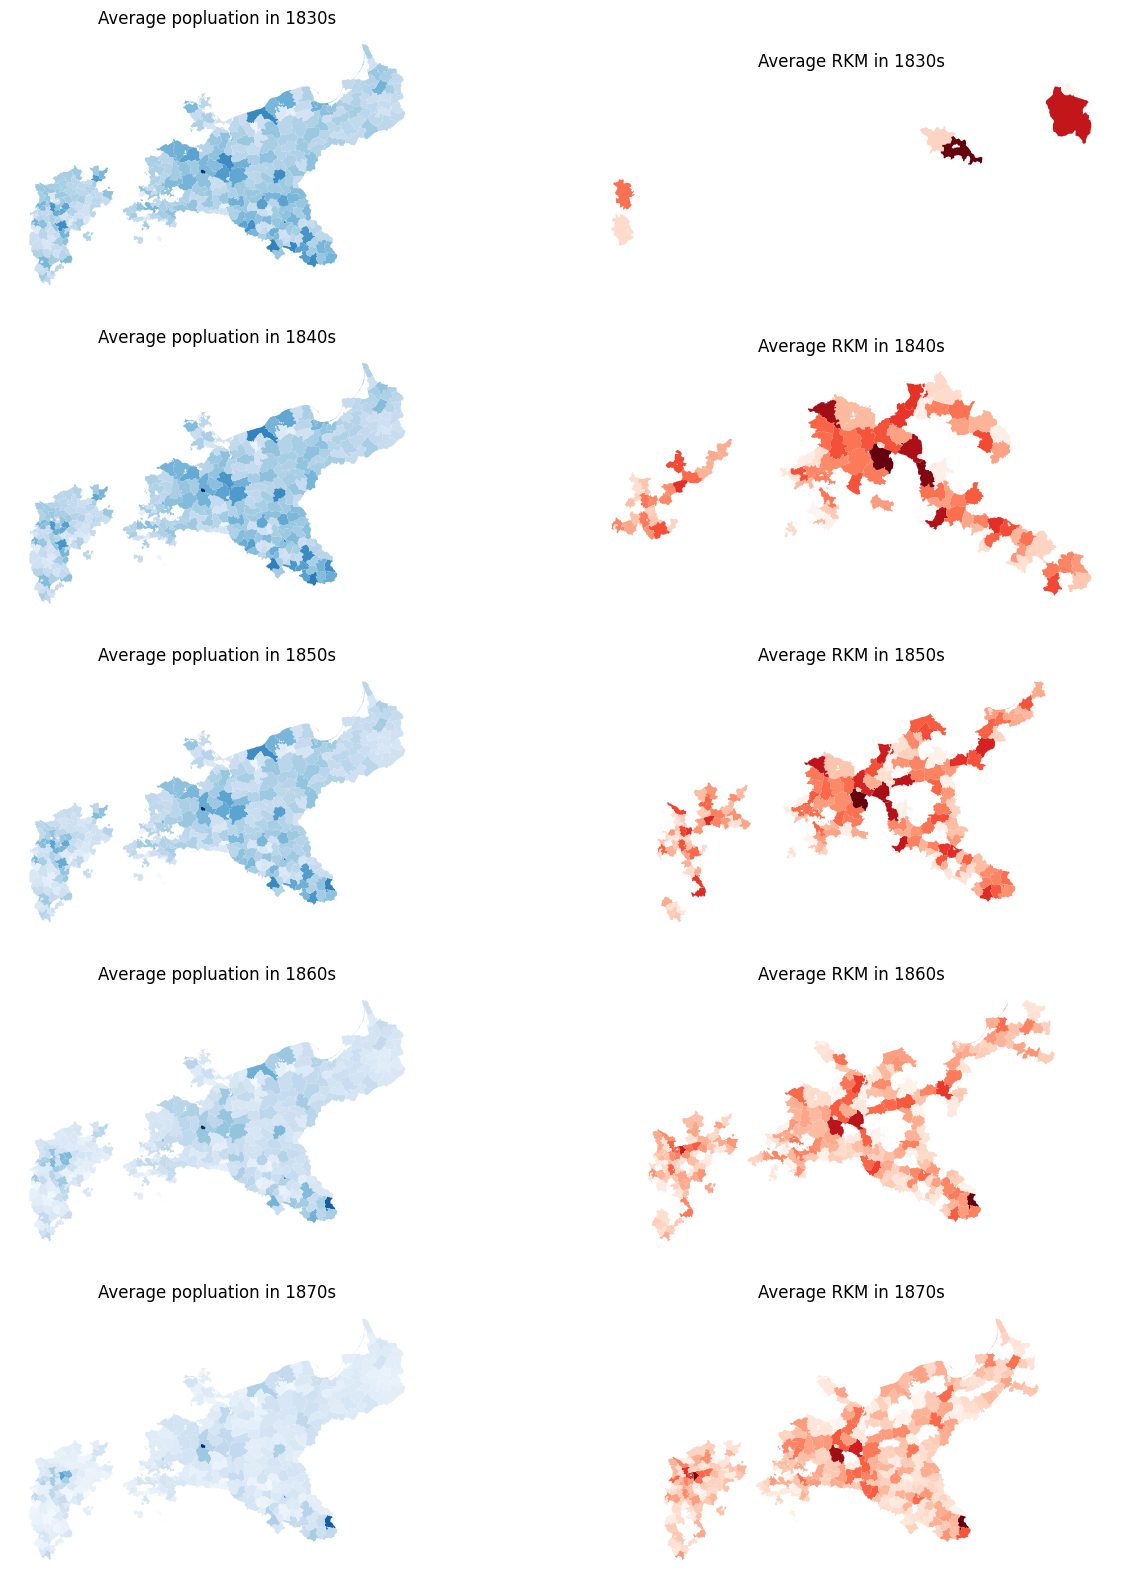

In [ ]:
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(15, 20))

# Flatten the axes array to a 1D list for easier indexing
axes = axes.flatten()

# Iterate over the axes and plot each map on a different subplot
for i, year in enumerate([1830, 1840, 1850, 1860, 1870]):
    # Plot the left map with cholera rates
    merged_df.plot(column=f'p_{year}s', cmap='Blues', legend=False, ax=axes[2*i])
    axes[2*i].set_title(f'Average popluation in {year}s')
    axes[2*i].axis('off')

    # Plot the right map with river distances
    merged_df.plot(column=f'rkm_{year}s', cmap='Reds', legend=False, ax=axes[2*i+1])
    axes[2*i+1].set_title(f'Average RKM in {year}s')
    axes[2*i+1].axis('off')

# Adjust the spacing between subplots and show the plot
#plt.subplots_adjust(hspace=0.3, wspace=0.1)
plt.show()
#fig.savefig('myplot.png', dpi=300)
#files.download('myplot.png')

In [ ]:
import io
import zipfile
uploaded = files.upload()
zip_file_name = list(uploaded.keys())[0]
zip_content = uploaded[zip_file_name]

with zipfile.ZipFile(io.BytesIO(zip_content), 'r') as zip_ref:
    temp_dir = '/content/temp_extract'
    zip_ref.extractall(temp_dir)

shapefile_path = f'{temp_dir}/German_Union (GER)_1870_v.1.0.shp'
map1 = gpd.read_file(shapefile_path)

Saving map_prussia_1870.zip to map_prussia_1870.zip


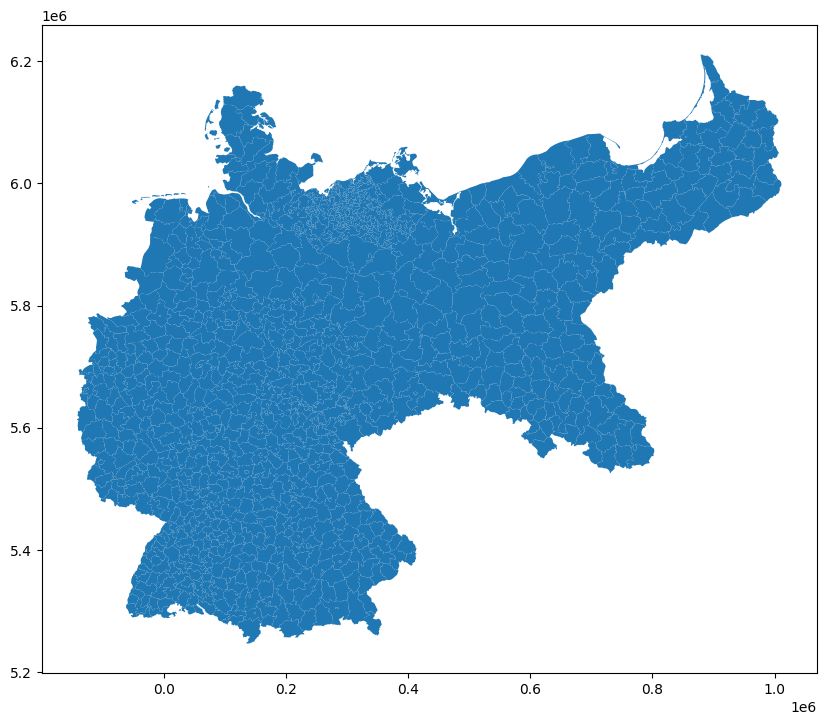

In [ ]:
map1.plot(figsize=(10, 10))
plt.show()

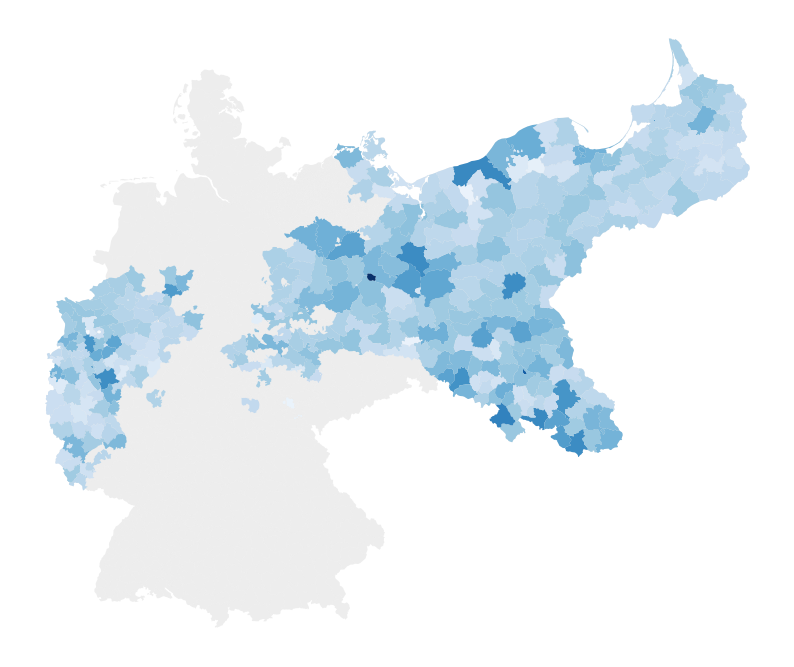

In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Assuming map1 and merged_df are your GeoDataFrames
map1 = map1.to_crs(merged_df.crs)

fig, ax = plt.subplots(figsize=(10, 10))
ax.axis('off')

# Plot map1 as the background
map1.plot(ax=ax, alpha=0.4, color="lightgray")

# Overlay merged_df.plot on top of map1
merged_df.plot(column=f'p_{1830}s', cmap='Blues', ax=ax)

plt.show()


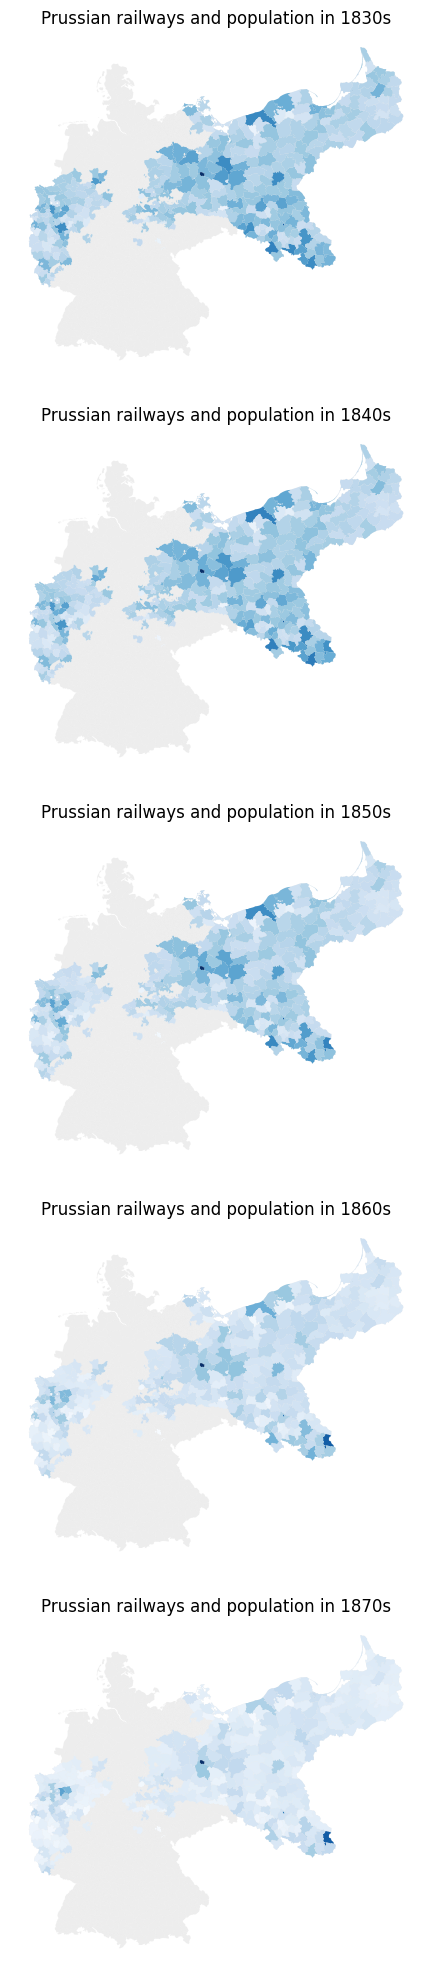

In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Assuming map1 and merged_df are your GeoDataFrames
years = [1830, 1840, 1850, 1860, 1870]

fig, axes = plt.subplots(nrows=5, ncols=1, figsize=(15, 20))

for idx, year in enumerate(years):
    map1_year = map1.to_crs(merged_df.crs)

    ax = axes[idx]
    ax.axis('off')
    ax.set_title(f'Prussian railways and population in {year}s')

    # Plot map1 as the background
    map1_year.plot(ax=ax, alpha=0.4, color="lightgray")

    # Overlay merged_df.plot on top of map1
    merged_df.plot(column=f'p_{year}s', cmap='Blues', ax=ax)

plt.tight_layout()
plt.show()


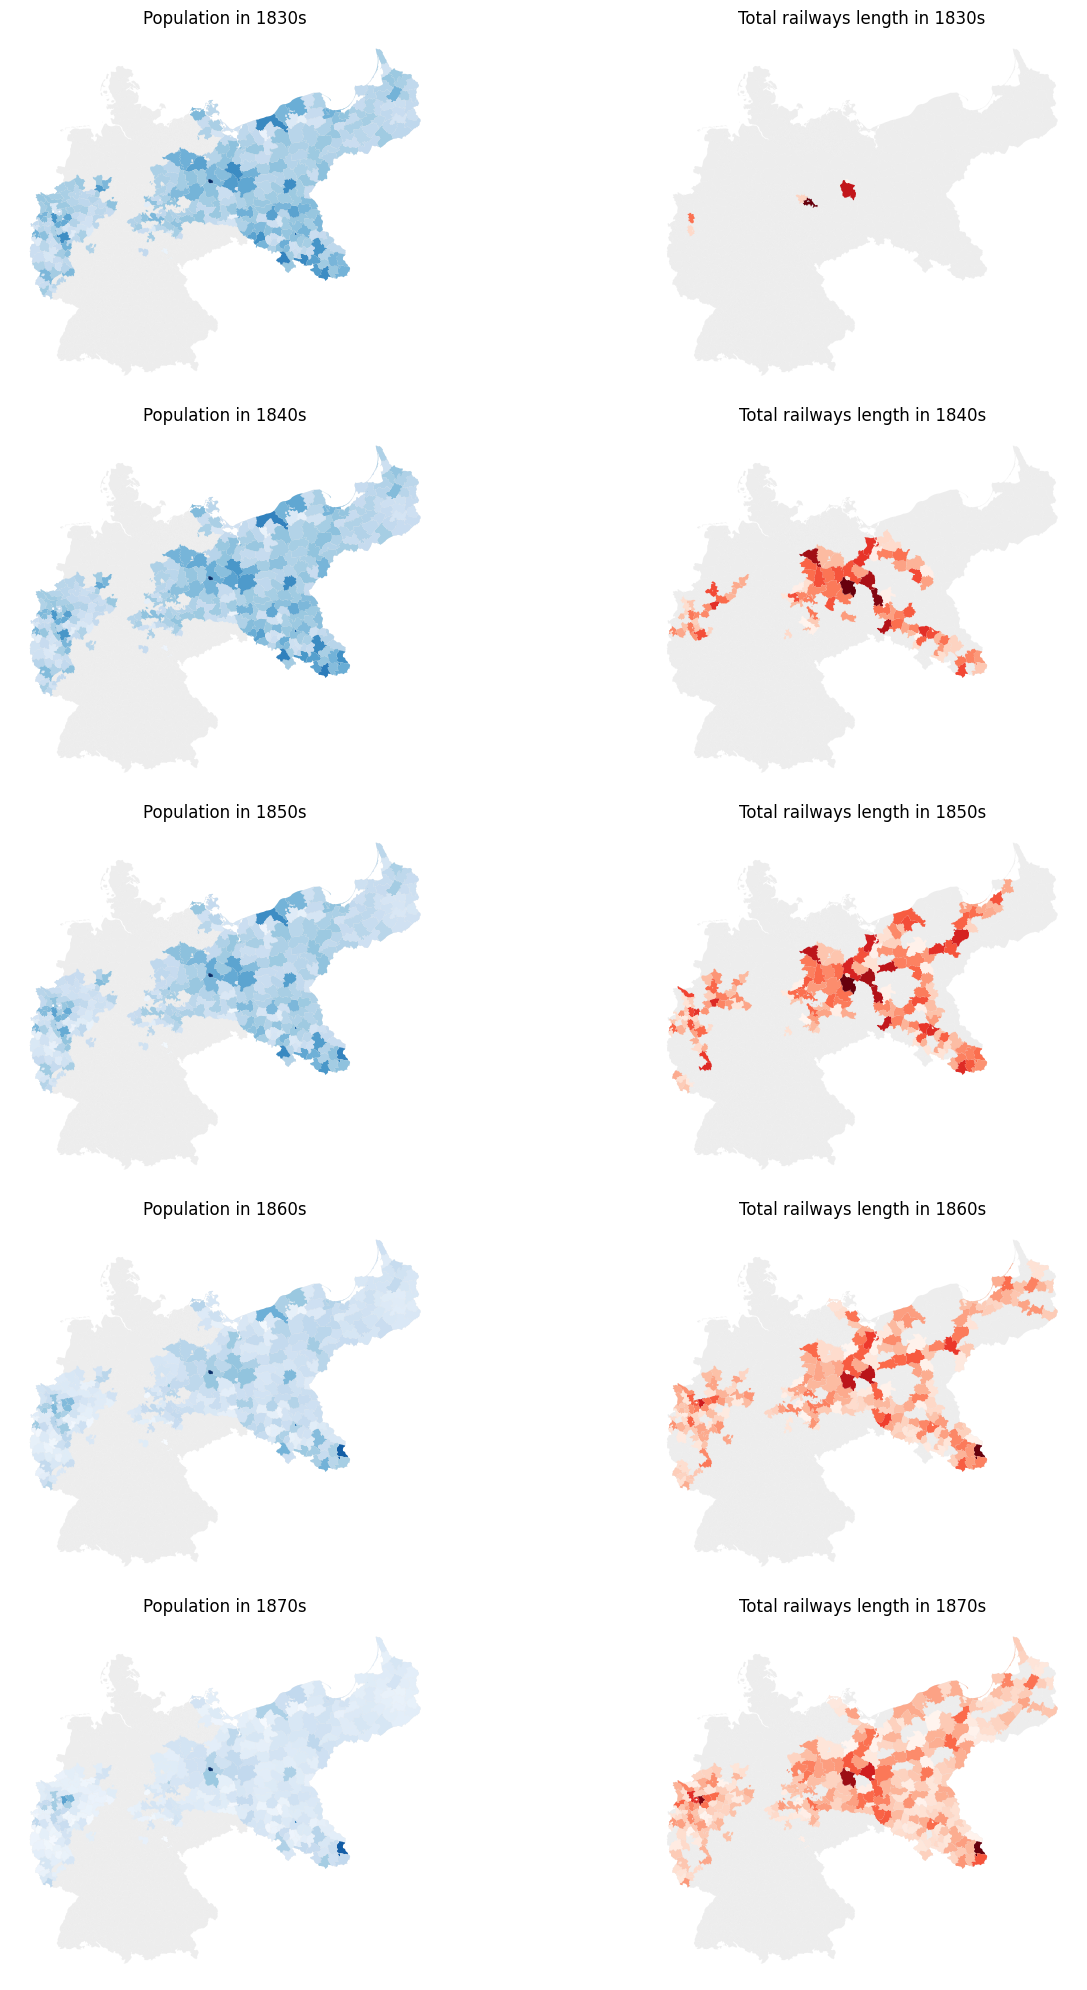

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Assuming map1 and merged_df are your GeoDataFrames
years = [1830, 1840, 1850, 1860, 1870]

fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(15, 20))

for idx, year in enumerate(years):
    map1_year = map1.to_crs(merged_df.crs)

    ax_rails = axes[idx, 0]
    ax_rails.axis('off')
    ax_rails.set_title(f'Population in {year}s')

    # Plot map1 as the background
    map1_year.plot(ax=ax_rails, alpha=0.4, color="lightgray")

    # Overlay merged_df.plot for population on top of map1
    merged_df.plot(column=f'p_{year}s', cmap='Blues', ax=ax_rails)

    ax_rkm = axes[idx, 1]
    ax_rkm.axis('off')
    ax_rkm.set_title(f'Total railways length in {year}s')

    # Plot map1 as the background
    map1_year.plot(ax=ax_rkm, alpha=0.4, color="lightgray")

    # Overlay merged_df.plot for railway length on top of map1
    merged_df.plot(column=f'rkm_{year}s', cmap='Reds', ax=ax_rkm)

plt.tight_layout()
plt.show()
fig.savefig('pop_rkm.png', dpi=300)
files.download('pop_rkm.png')

In [ ]:
from shapely.geometry import Point
city_names = [
    'Hamburg', 'Leipzig', 'Mannheim','Memel',
    'Danzig', 'Stettin', 'Stralsund', 'Frankfurt', 'Berlin', 'Magdeburg', 'Köln',
    'Schweidnitz', 'Münster', 'Aachen'
]

city_coordinates = [
    (9.9872, 53.5488),      # Hamburg
    (12.3731, 51.3397),     # Leipzig
    (8.4660, 49.4875),      # Mannheim
    (21.1443, 55.7033),     # Memel
    (18.6466, 54.3520),     # Danzig
    (14.5528, 53.4285),     # Stettin
    (13.0770, 54.3091),     # Stralsund
    (14.5506, 52.3472),     # Frankfurt
    (13.4050, 52.5200),     # Berlin
    (11.616667, 52.133331), # Magdeburg
    (6.953101, 50.935173),  # Köln
    (16.4757, 50.8498),     # Schweidnitz
    (7.6261, 51.9607),      # Münster
    (6.083611, 50.775555)   # Aachen
]

geometry = [Point(xy) for xy in city_coordinates]
data = {'City': city_names, 'Geometry': geometry}
gdfPlaces = gpd.GeoDataFrame(data, geometry='Geometry')
gdfPlaces

,City,Geometry
0,Hamburg,POINT (9.98720 53.54880)
1,Leipzig,POINT (12.37310 51.33970)
2,Mannheim,POINT (8.46600 49.48750)
3,Memel,POINT (21.14430 55.70330)
4,Danzig,POINT (18.64660 54.35200)
5,Stettin,POINT (14.55280 53.42850)
6,Stralsund,POINT (13.07700 54.30910)
7,Frankfurt,POINT (14.55060 52.34720)
8,Berlin,POINT (13.40500 52.52000)
9,Magdeburg,POINT (11.61667 52.13333)


In [ ]:
# Set the CRS for gdfPlaces to EPSG 4326 (WGS 84)
gdfPlaces = gdfPlaces.set_crs(epsg=4326)

# Transform gdfPlaces to the CRS of map1
#gdfPlaces = gdfPlaces.to_crs(map1.crs)
map1 = map1.to_crs(gdfPlaces.crs)

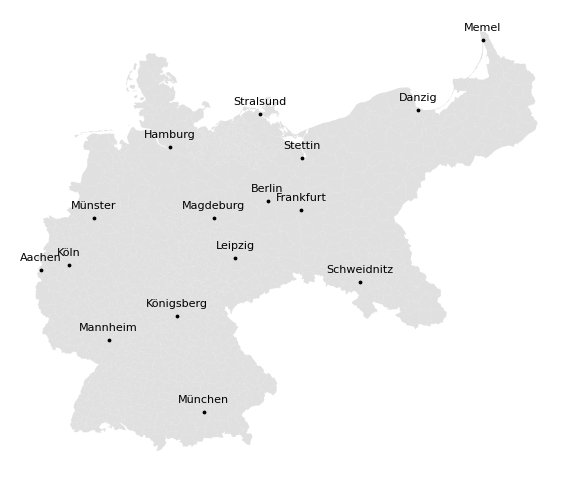

In [ ]:


# Transform map1 to the CRS of gdfPlaces
map1 = map1.to_crs(gdfPlaces.crs)

# Create a figure and axis
fig, ax = plt.subplots(figsize=(8, 6))

# Turn off the axis
ax.axis('off')

# Plot map1 and gdfPlaces with pink color
map1.plot(ax=ax, alpha=0.7, color="lightgray")
gdfPlaces.plot(ax=ax, alpha=1, color="black", markersize=3, label="Cities")

# Add labels to the city points
for idx, row in gdfPlaces.iterrows():
    ax.annotate(row['City'], (row['Geometry'].x, row['Geometry'].y), fontsize=8,
                ha='center', va='bottom', xytext=(0, 5), textcoords='offset points')


# Show the plot
plt.show()

In [ ]:
uploaded = files.upload()
zip_file_name = list(uploaded.keys())[0]
zip_content = uploaded[zip_file_name]

with zipfile.ZipFile(io.BytesIO(zip_content), 'r') as zip_ref:
    temp_dir = '/content/temp_extract'
    zip_ref.extractall(temp_dir)

shapefile_path = f'{temp_dir}/railways.shp'
gdfRails = gpd.read_file(shapefile_path)

Saving railways.zip to railways.zip


In [ ]:
uploaded = files.upload()
zip_file_name = list(uploaded.keys())[0]
zip_content = uploaded[zip_file_name]

with zipfile.ZipFile(io.BytesIO(zip_content), 'r') as zip_ref:
    temp_dir = '/content/temp_extract'
    zip_ref.extractall(temp_dir)

shapefile_path = f'{temp_dir}/stations.shp'
gdfStations = gpd.read_file(shapefile_path)

Saving stations.zip to stations.zip


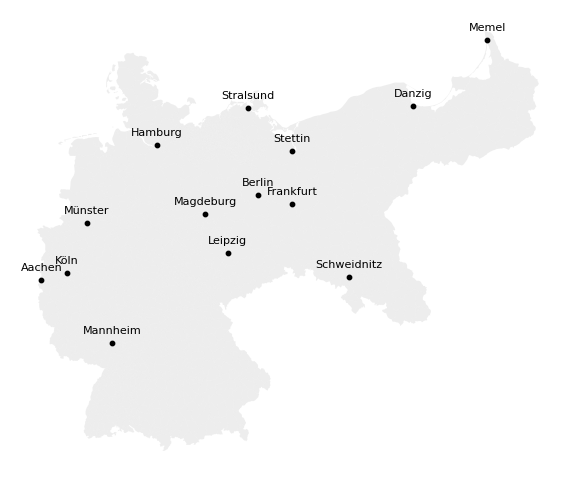

In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Assuming map1, gdfStations, and gdfRails are your GeoDataFrames

# Transform map1 to the CRS of gdfRails
map1 = map1.to_crs(gdfRails.crs)

# Create a figure and axis
fig, ax = plt.subplots(figsize=(8, 6))

ax.axis('off')

# Plot map1 with gray color
map1.plot(ax=ax, alpha=0.4, color="lightgray")

# Plot gdfRails and gdfStations on the same axis
gdfPlaces.plot(ax=ax, alpha=1, color="black", markersize=10)
#gdfRails.plot(ax=ax, alpha=1, color=(255/255, 253/255, 208/255), markersize=1)

# Add labels to the city points
for idx, row in gdfPlaces.iterrows():
    ax.annotate(row['City'], (row['Geometry'].x, row['Geometry'].y), fontsize=8,
                ha='center', va='bottom', xytext=(0, 5), textcoords='offset points')

# Show the plot
plt.show()
#fig.savefig('map_cities.png', dpi=300)
#files.download('map_cities.png')

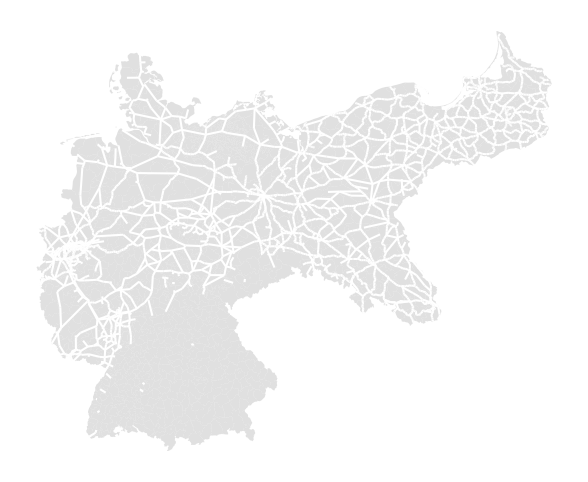

In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Assuming map1, gdfPlaces, and gdfRails are your GeoDataFrames

# Transform map1 to the CRS of gdfPlaces
map1 = map1.to_crs(gdfRails.crs)

# Create a figure and axis
fig, ax = plt.subplots(figsize=(8, 6))

# Turn off the axis
ax.axis('off')

# Plot gdfRails on map1
gdfRails.plot(ax=ax, alpha=1, color="white", markersize=1)

# Plot map1 with gdfRails as the background
map1.plot(ax=ax, alpha=0.7, color="lightgray")

# Plot gdfPlaces on top of map1


# Show the plot
plt.show()


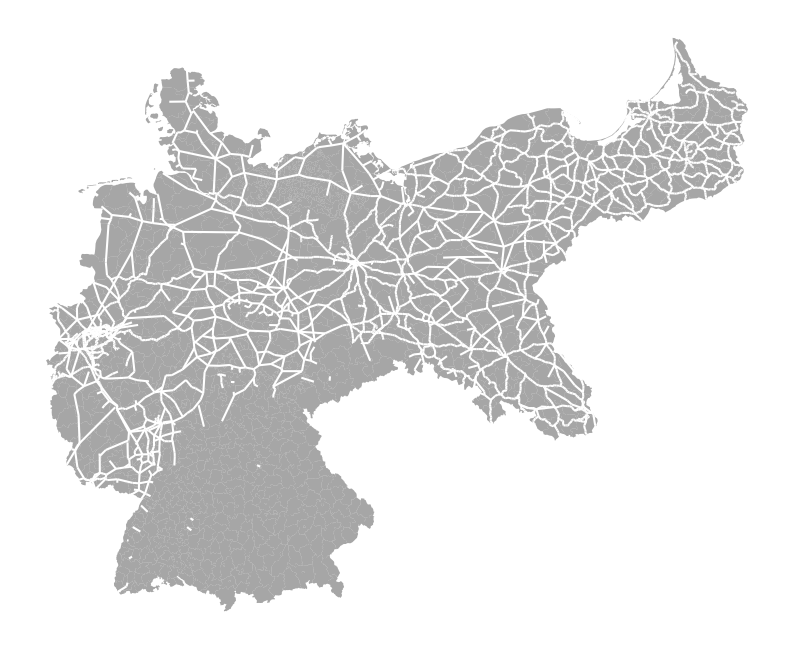

In [ ]:
map1 = map1.to_crs(gdfRails.crs)
#map1 = map1.to_crs(gdfStations.crs)

# Create a figure and axis
fig, ax = plt.subplots(figsize=(10, 10))

ax.axis('off')

# Plot map1 and gdfPlaces with pink color
map1.plot(ax=ax, alpha=0.7, color="gray")
#map1.plot(ax=ax, edgecolor='black', facecolor='none')  # Adjust the edgecolor as needed
gdfRails.plot(ax=ax, alpha=1, color="white", markersize=1)
#gdfStations.plot(ax=ax, alpha=0.7, color="black", markersize=1)




# Show the plot
plt.show()

###################################

In [ ]:
upload = files.upload()
pop_rkm = pd.read_csv('/content/pop_rkm.csv', sep=';')

Saving pop_rkm.csv to pop_rkm (1).csv


In [ ]:
pop_rkm

,Variable,Pop,Railway
0,1817,25009,NaN
1,1818,25369,NaN
2,1819,25733,NaN
3,1820,26101,NaN
4,1821,26473,NaN
...,...,...,...
178,1997,82052,NaN
179,1998,82029,NaN
180,1999,82087,NaN
181,2000,82188,NaN


In [ ]:
pop_rkm = pop_rkm.astype(str)
pop_rkm = pop_rkm.applymap(lambda x: x.replace(',', '.'))
pop_rkm = pop_rkm.apply(pd.to_numeric, errors='coerce')

In [ ]:
pop_rkm

,Variable,Pop,Railway
0,1817,25009,NaN
1,1818,25369,NaN
2,1819,25733,NaN
3,1820,26101,NaN
4,1821,26473,NaN
...,...,...,...
178,1997,82052,NaN
179,1998,82029,NaN
180,1999,82087,NaN
181,2000,82188,NaN


In [ ]:
desired_variables = [1840, 1850, 1860, 1870, 1880, 1890, 1900, 1913]

# Filter the rows based on the desired Variable values
pop_rkm = pop_rkm[pop_rkm['Variable'].isin(desired_variables)]

In [ ]:
pop_rkm['Pop'] = pop_rkm['Pop'] / 1000

<ipython-input-38-e1cf40696365>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pop_rkm['Pop'] = pop_rkm['Pop'] / 1000


In [ ]:
pop_rkm['Railway'] = pop_rkm['Railway'] / 1000

<ipython-input-41-606ca39253cb>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pop_rkm['Railway'] = pop_rkm['Railway'] / 1000


In [ ]:
pop_rkm

,Variable,Pop,Railway
23,1840,32.621,0.133
33,1850,35.303,2.650
43,1860,37.609,5.200
53,1870,40.804,10.821
63,1880,45.095,20.020
73,1890,49.239,25.464
83,1900,56.046,34.536
96,1913,66.978,47.771


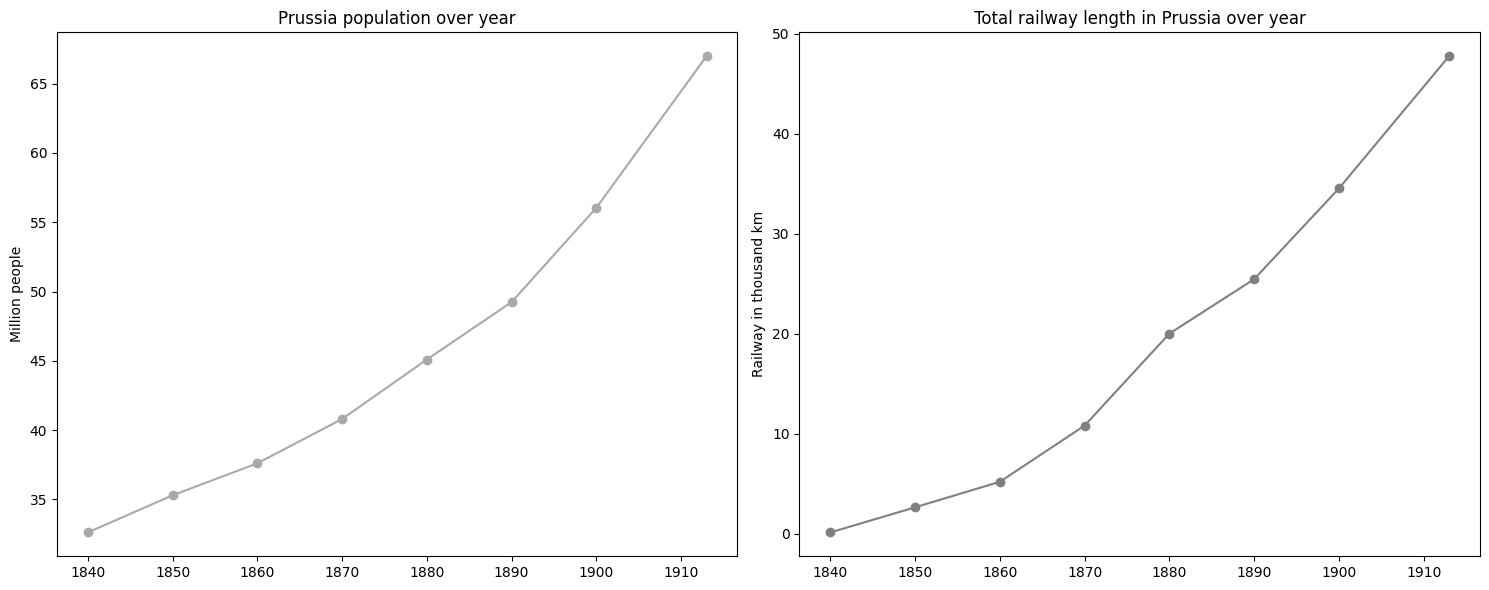

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))

# Plot for Population
axes[0].plot(pop_rkm['Variable'], pop_rkm['Pop'], marker='o', linestyle='-', color='darkgray')
axes[0].set_ylabel('Million people')
axes[0].set_title('Prussia population over year')

# Plot for Railway Length
axes[1].plot(pop_rkm['Variable'], pop_rkm['Railway'], marker='o', linestyle='-', color='gray')
axes[1].set_ylabel('Railway in thousand km')
axes[1].set_title('Total railway length in Prussia over year')

# Adjust layout to prevent overlapping titles and labels
plt.tight_layout()

# Show the combined figure
plt.show()
fig.savefig('pop_rkm2.png', dpi=300)
files.download('pop_rkm2.png')

###############################

In [ ]:
upload = files.upload()
iron = pd.read_csv('/content/iron_fac.csv', sep=';')

Saving iron_fac.csv to iron_fac.csv


In [ ]:
iron

,Variable,Verbrauch,Factories,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6
0,1846,NaN,417.0,NaN,NaN,NaN,NaN
1,1847,NaN,NaN,NaN,NaN,NaN,NaN
2,1848,NaN,NaN,NaN,NaN,NaN,NaN
3,1849,NaN,NaN,NaN,NaN,NaN,NaN
4,1850,NaN,NaN,NaN,NaN,NaN,NaN
5,1851,318513.0,NaN,NaN,NaN,NaN,NaN
6,1852,348600.0,NaN,NaN,NaN,NaN,NaN
7,1853,389668.0,505.0,NaN,NaN,NaN,NaN
8,1854,499319.0,NaN,NaN,NaN,NaN,NaN
9,1855,579890.0,NaN,NaN,NaN,NaN,NaN


In [ ]:
iron = iron.astype(str)
iron = iron.applymap(lambda x: x.replace(',', '.'))
iron = iron.apply(pd.to_numeric, errors='coerce')

In [ ]:
iron

,Variable,Verbrauch,Factories,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6
0,1846,NaN,417.0,NaN,NaN,NaN,NaN
1,1847,NaN,NaN,NaN,NaN,NaN,NaN
2,1848,NaN,NaN,NaN,NaN,NaN,NaN
3,1849,NaN,NaN,NaN,NaN,NaN,NaN
4,1850,NaN,NaN,NaN,NaN,NaN,NaN
5,1851,318513.0,NaN,NaN,NaN,NaN,NaN
6,1852,348600.0,NaN,NaN,NaN,NaN,NaN
7,1853,389668.0,505.0,NaN,NaN,NaN,NaN
8,1854,499319.0,NaN,NaN,NaN,NaN,NaN
9,1855,579890.0,NaN,NaN,NaN,NaN,NaN


In [ ]:
iron['Verbrauch'] = iron['Verbrauch'] / 1000000

In [ ]:
new_iron = iron[['Variable', 'Factories']].copy()
new_iron.dropna(subset=['Factories'], inplace=True)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

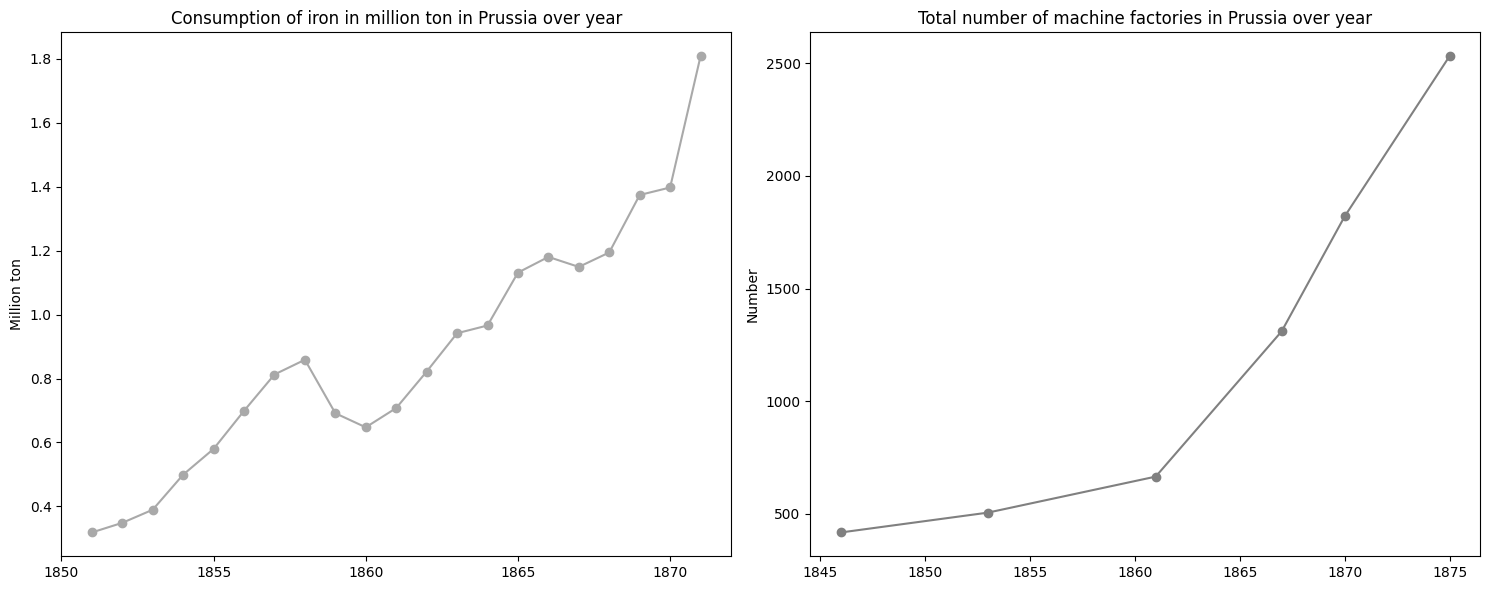

In [ ]:
import matplotlib.pyplot as plt

# Your data and plot settings

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))

# Plot for Population
axes[0].plot(iron['Variable'], iron['Verbrauch'], marker='o', linestyle='-', color='darkgray')
axes[0].set_ylabel('Million ton')
axes[0].set_title('Consumption of iron in million ton in Prussia over year')

# Set custom tick labels on the x-axis of the left plot
custom_tick_labels = range(1850, 1875, 5)
axes[0].set_xticks(custom_tick_labels)
axes[0].set_xticklabels(custom_tick_labels)

# Plot for Railway Length
axes[1].plot(new_iron['Variable'], new_iron['Factories'], marker='o', linestyle='-', color='gray')
axes[1].set_ylabel('Number')
axes[1].set_title('Total number of machine factories in Prussia over year')

# Adjust layout to prevent overlapping titles and labels
plt.tight_layout()

plt.savefig('pop_rkm3.png', dpi=300)
files.download('pop_rkm3.png')
plt.show()

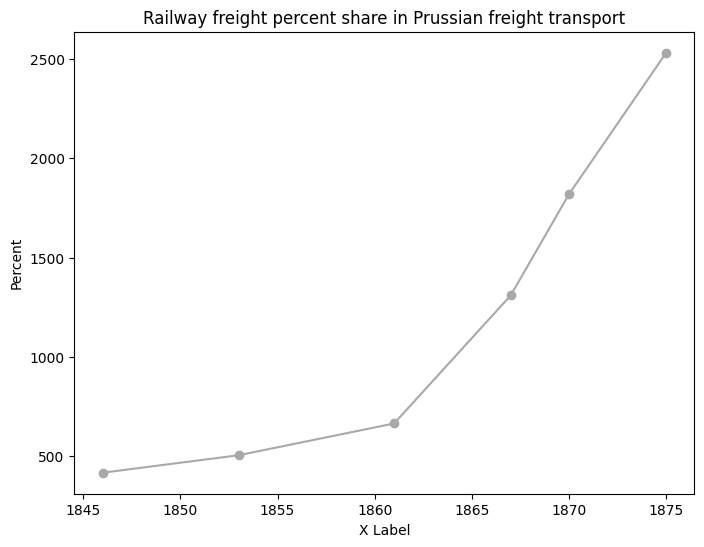

In [ ]:
import matplotlib.pyplot as plt
new_iron = iron[['Variable', 'Factories']].copy()
new_iron.dropna(subset=['Factories'], inplace=True)
plt.figure(figsize=(8, 6))

# Create the plot with lines connecting the markers
plt.plot(new_iron['Variable'], new_iron['Factories'], marker='o', linestyle='-', color='darkgray', markerfacecolor='darkgray')

# Add labels and title
plt.ylabel('Percent')
plt.xlabel('X Label')  # Replace 'X Label' with an appropriate label for your x-axis
plt.title('Railway freight percent share in Prussian freight transport')

# Save the figure or display it
plt.show()
